In [68]:
from visualize_correlations import *

/home/skhajehabdollahi/Documents/cppn-tensorflow-master/venv/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


# Load CPPN image stats

In [3]:
def load_cppncorrs(forceCalculate=False):
    dir = 'save/img_architectures'
    img_folder = 'big'
    method = 'fft_norm'
    corrs_paths, _ = load_img_paths_and_params(dir, img_folder, method)

    # load global stats
    c_mean_t, c_var_t = global_cppn_stats(dir, img_folder, method, forceCalculate=forceCalculate)

    # load all cppn means

    highlight_keys = [
        'total_neurons',
        'num_layers',
        'omega',
        'alpha',
        'mu'
    ]

    corrs_means, corrs_quantiles, corr_vars, means_params = \
        architecture_correlation_means(dir, img_folder, highlight_keys,
                                       method, forceCalculate=forceCalculate)
    data_cppn = {
        'corrs_means': corrs_means,
        'corr_vars': corr_vars,
        'means_params': means_params
    }
    
    return data_cppn, c_mean_t, c_var_t

# data_cppn, c_mean_t, c_var_t = load_cppncorrs(forceCalculate=False)

### Load global CPPN stats (small file, legacy cell)

In [3]:
dir = 'save/img_architectures'
img_folder = 'big'
method = 'fft_norm'

c_mean, c_var = global_cppn_stats(dir, img_folder, method, forceCalculate=False)

Loading correlation means: save/img_architectures/big/corrs/fft_norm/stats/big_corr_stats.txt


(1e-05, 1.2)

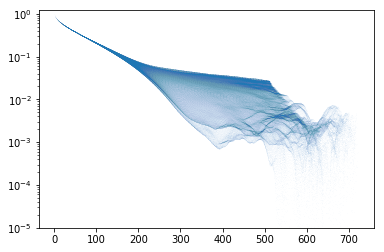

In [15]:
distances = dist_vec((1023,1023))
plt.scatter(distances, c_mean, s=0.01, alpha=0.05)
plt.yscale('log')
plt.ylim([1e-5, 1.2])

# Load aesthetic images (old)

In [2]:
img_dir = 'save/img_architectures'
img_folder = 'big'
method = 'fft_norm'

with open('save/img_architectures/big/aesthetic_tag.txt', 'r') as f:
    aesthetic_dirs = f.read().splitlines()
    
    
takeMean = False

aesthetic_corrs, aesthetic_corrs_vars, aesthetic_params = \
    aesthetic_correlations(img_dir, img_folder, aesthetic_dirs, method, takeMean=takeMean, forceCalculate=True)

data_aesthetic = {
    'corrs': aesthetic_corrs,
    'var': aesthetic_corrs_vars,
    'params': aesthetic_params
}

Gathering aesthetic correlations...


# Load aesthetic images (new)

## Concatenate aesthetic list across subjects

In [2]:
img_dir = 'save/img_architectures'
aes_dir = 'big_aesthetic_experiment/aesthetic_list'
wd = os.path.join(img_dir, aes_dir)
aes_paths = [os.path.join(wd, f) for f in os.listdir(wd)
                   if f.endswith('.txt')]
aes_dict = []
for ap in aes_paths:
    with open(ap, 'r') as f:
        for line in f:
            
            # check if absolute paths were accidentally used instead of filenames
            if os.path.isabs(line):
                line = os.path.basename(line)
            
            # append imagenames to a dict
            aes_dict.append({
                'imgName' : line.split("_", 1)[1].splitlines()[0],
                'subject': '_'.join(os.path.basename(ap).split("_")[1:3]),
                'mode': os.path.basename(ap).split("_")[3]})

# save as text file (for easy reading)
output_filename_txt = os.path.join(img_dir, 'big_aesthetic_experiment/combined_list.txt')
with open(output_filename_txt, 'w') as f:
    for item in aes_dict:
        f.write("%s\n" % item)

# save with pickle (for easy loading)
output_filename_pickle = os.path.join(img_dir, 'big_aesthetic_experiment/combined_list')
with open(output_filename_pickle, 'wb') as fp:
    pickle.dump(aes_dict, fp)


## Load aesthetic correlations/params

In [16]:
img_dir = 'save/img_architectures'
img_folder = 'big'
method = 'fft_norm'

output_filename_pickle = os.path.join(img_dir, 'big_aesthetic_experiment/combined_list')
with open(output_filename_pickle, 'rb') as f:
    aesthetic_info = pickle.load(f)
    
aesthetic_img_names = [a['imgName'] for a in aesthetic_info if a['mode'] == 'BW']   
takeMean = False

aesthetic_corrs, aesthetic_corrs_vars, aesthetic_params = \
    aesthetic_correlations(img_dir, img_folder, aesthetic_img_names, method, takeMean=takeMean, forceCalculate=True)

data_aesthetic = {
    'corrs': aesthetic_corrs,
    'var': aesthetic_corrs_vars,
    'params': aesthetic_params
}

In [73]:
aesthetic_img_names

['N500_L10_w-2_a2_m-1_30',
 'N500_L5_w-0.5_a5_m-1_11',
 'N250_L3_w-0.5_a5_m0.1_00',
 'N250_L3_w-0.5_a5_m1_03',
 'N500_L10_w-1_a5_m0.5_23',
 'N100_L5_w1_a5_m0.5_30',
 'N500_L10_w2_a2_m-1_02',
 'N500_L3_w-0.5_a5_m-0.5_11',
 'N250_L3_w-2_a5_m1_02',
 'N250_L5_w2_a2_m-1_01',
 'N250_L3_w0_a2_m0_17',
 'N100_L5_w-1_a2_m-0.5_08',
 'N100_L3_w0_a2_m1_23',
 'N100_L3_w0_a5_m0_32',
 'N250_L3_w-2_a2_m-1_33',
 'N100_L5_w-2_a5_m0.5_01',
 'N500_L3_w-2_a5_m1_08',
 'N100_L10_w0_a2_m0.5_28',
 'N100_L5_w-1_a2_m0_27',
 'N500_L3_w0.5_a2_m0_02',
 'N500_L5_w2_a2_m1_16',
 'N500_L10_w2_a5_m-0.1_21',
 'N500_L5_w2_a5_m0.5_19',
 'N500_L10_w-2_a2_m0.5_11',
 'N250_L3_w-2_a2_m-1_39',
 'N250_L5_w2_a5_m0.5_38',
 'N100_L3_w2_a2_m0_17',
 'N100_L3_w-0.5_a5_m-0.5_03',
 'N250_L3_w1_a5_m1_03',
 'N250_L3_w1_a2_m1_10',
 'N250_L3_w-0.5_a2_m1_17',
 'N500_L10_w0_a2_m-1_21',
 'N100_L3_w-2_a2_m0.5_12',
 'N100_L5_w2_a2_m0.1_19',
 'N250_L10_w0.5_a5_m-1_14',
 'N100_L10_w0_a5_m-0.5_17',
 'N500_L3_w0_a2_m0.5_21',
 'N250_L5_w1_a2_m0.5_19',

## Get list of presented images

In [7]:
import imghdr

wd = 'save/img_architectures/big_aesthetic_experiment/presented'
sub_folder = np.unique(['subject_' + a['subject'] for a in aesthetic_info])

mode = 'BW'
img_paths = []
for s in sub_folder:
    img_folder_path = os.path.join(wd, s, mode)
    # load filenames if they are png files (images dont have extensions and there are hidden files in these folders)
    im_names = np.stack([''.join(f.split('_', 1)[1:]) for f in os.listdir(img_folder_path)
                         if imghdr.what(os.path.join(img_folder_path, f)) is 'png'])
    img_paths.append(im_names)
    if np.shape(im_names)[0] > 200:
        print(s, img_folder_path)


NameError: name 'aesthetic_info' is not defined

In [162]:
np.stack(img_paths).reshape(-1).shape  # number of unique images presented

(9000,)

## Duplicate entries

In [9]:
aes_img_names = [a['imgName'] for a in aes_dict if a['mode']=='BW']
values, counts = np.unique(aes_img_names, return_counts=True)
dup = values[counts > 1]
print(dup)
print(f'# of aesthetic tags: {len(aes_img_names)}')

['N100_L10_w-1_a5_m-0.1_36' 'N100_L10_w0_a5_m-0.5_17'
 'N100_L3_w-0.5_a2_m0.1_07' 'N100_L3_w-2_a2_m0.5_18'
 'N100_L3_w-2_a5_m1_22' 'N100_L3_w0.5_a2_m-0.1_04' 'N100_L3_w2_a5_m0.5_38'
 'N100_L5_w-0.5_a5_m-0.5_31' 'N100_L5_w-1_a2_m0_25'
 'N100_L5_w-1_a5_m-0.1_39' 'N100_L5_w0.5_a2_m0.5_16'
 'N100_L5_w0.5_a5_m-0.1_34' 'N100_L5_w0_a5_m-0.5_07'
 'N100_L5_w1_a5_m0.1_27' 'N100_L5_w1_a5_m0.5_30' 'N250_L10_w0_a2_m0_18'
 'N250_L10_w0_a5_m-0.5_22' 'N250_L10_w1_a5_m0.1_24'
 'N250_L3_w-1_a5_m-0.5_32' 'N250_L3_w-2_a2_m-0.5_06'
 'N250_L3_w0.5_a2_m0.5_38' 'N250_L3_w0.5_a5_m1_05' 'N250_L3_w1_a5_m0.1_00'
 'N250_L5_w-1_a2_m0.5_05' 'N250_L5_w1_a2_m-1_29' 'N250_L5_w1_a2_m0.5_16'
 'N500_L10_w-2_a5_m-0.1_34' 'N500_L10_w0.5_a5_m0.1_32'
 'N500_L10_w0_a2_m-0.5_39' 'N500_L10_w1_a2_m-0.5_09'
 'N500_L10_w1_a2_m-0.5_13' 'N500_L10_w2_a5_m-0.5_33'
 'N500_L3_w-0.5_a2_m-1_18' 'N500_L3_w-0.5_a5_m0.5_11'
 'N500_L3_w-1_a5_m-0.1_03' 'N500_L3_w0_a2_m-1_12' 'N500_L3_w0_a5_m1_21'
 'N500_L3_w2_a2_m0.1_07' 'N500_L3_w2_a5_m1_08' '

In [7]:
def search(key, keySearch, dict_list):
    return [d for d in dict_list if d[key] == keySearch]

In [10]:
dup_info = []
for d in dup:
    dup_info.append(search('imgName', d, aes_dict))

print('\n'.join('{}: {}'.format(*k) for k in enumerate(dup_info)))

0: [{'imgName': 'N100_L10_w-1_a5_m-0.1_36', 'subject': '49_VM', 'mode': 'BW'}, {'imgName': 'N100_L10_w-1_a5_m-0.1_36', 'subject': '44_CP', 'mode': 'BW'}]
1: [{'imgName': 'N100_L10_w0_a5_m-0.5_17', 'subject': '18_EC', 'mode': 'BW'}, {'imgName': 'N100_L10_w0_a5_m-0.5_17', 'subject': '15_AP', 'mode': 'BW'}]
2: [{'imgName': 'N100_L3_w-0.5_a2_m0.1_07', 'subject': '37_JF', 'mode': 'BW'}, {'imgName': 'N100_L3_w-0.5_a2_m0.1_07', 'subject': '35_RI', 'mode': 'BW'}]
3: [{'imgName': 'N100_L3_w-2_a2_m0.5_18', 'subject': '27_AZ', 'mode': 'BW'}, {'imgName': 'N100_L3_w-2_a2_m0.5_18', 'subject': '40_DH', 'mode': 'BW'}]
4: [{'imgName': 'N100_L3_w-2_a5_m1_22', 'subject': '04_BRK', 'mode': 'BW'}, {'imgName': 'N100_L3_w-2_a5_m1_22', 'subject': '46_SS', 'mode': 'BW'}]
5: [{'imgName': 'N100_L3_w0.5_a2_m-0.1_04', 'subject': '27_AZ', 'mode': 'BW'}, {'imgName': 'N100_L3_w0.5_a2_m-0.1_04', 'subject': '17_IR', 'mode': 'BW'}]
6: [{'imgName': 'N100_L3_w2_a5_m0.5_38', 'subject': '33_FV', 'mode': 'BW'}, {'imgName': '

# Load natural images

In [ ]:
dir = 'natural_imgs/'
img_folders = ['Foliage', 'LandWater', 'Snow', 'Animals', 'Flowers', 'ManMade']
# img_folders = ['Animals', 'Flowers', 'ManMade']
method = 'fft_norm'  # 'fft_norm', 'sample'


corrs_means, _, corr_vars = \
    correlation_means(dir, img_folders, method, forceCalculate=False)

data_nat = {
    'corrs_means': corrs_means,
    'corr_var': corr_vars,
    'img_folders': img_folders
}

# (Fig 1) - CPPN Correlation functions 

In [69]:
dir = 'save/img_architectures'
img_folder = 'big'
method = 'fft_norm'

## DON'T CHANGE ##
highlight_keys = [
    'total_neurons',
    'num_layers',
    'omega',
    'alpha',
    'mu'
]


corrs_means, corrs_quantiles, corr_vars, means_params = \
    architecture_correlation_means(dir, img_folder, highlight_keys,
                                   method, forceCalculate=False)
data_cppn = {
    'corrs_means': corrs_means,
    'corr_vars': corr_vars,
}

Loading correlation means: save/img_architectures/big/corrs/fft_norm/means/big_corr_means.txt


## Filter settings

In [70]:
## FILTERS 
N = [None]  # total_neurons
L = [None]  # num layers
omega = [None]  # omega
alpha = [None]  # alpha
mu = [None]  # mu

filters = {
    'total_neurons': N,
    'num_layers': L,
    'omega': omega,
    'alpha': alpha,
    'mu': mu,
}

if filters is not None:
    filtered_index = filter_corrs(means_params, filters)

    corrs_means = [corrs_means[i] for i in filtered_index]
    corrs_quantiles = [corrs_quantiles[i] for i in filtered_index]
    corr_vars = [corr_vars[i] for i in filtered_index]
    means_params = [means_params[i] for i in filtered_index]
##

latex_dict = {
        'total_neurons': 'N',
        'num_layers': 'L',
        'omega': '\\omega',
        'alpha': '\\alpha',
        'mu': '\\mu',
}

### Bin data, extract inset data

In [71]:
distances = dist_vec((1023, 1023))  ## assumes a 512x512 image.

#######################################################
# playing around with how the variances are calculated. comment this for new calculations!!
# corrs_vars = [corrs_vars[i] * corrs_means[i]
#               for i in range(len(corrs_vars))]
#######################################################

corr_means, bin_edges, _ = scipy.stats.binned_statistic(
    distances, corrs_means, statistic='mean', bins=300)

# corr_q25, _, _ = scipy.stats.binned_statistic(
#     distances, corrs_q25, statistic='mean', bins=300)

# corr_q75, _, _ = scipy.stats.binned_statistic(
#     distances, corrs_q75, statistic='mean', bins=300)

corr_var, _, _ = scipy.stats.binned_statistic(
    distances, corr_vars, statistic='mean', bins=300)

d = (bin_edges[:-1] + bin_edges[1:]) / 2


## DATA FOR INSET
highlight_main = 'num_layers'
highlight_inset = 'total_neurons'
filter_inset = 'num_layers'
L = 3  # inset value

arch_index = [i for i in range(len(means_params)) 
              if means_params[i][filter_inset] == L]
arch_means_params = [means_params[i] for i in arch_index]
arch_corr_means = [corr_means[i] for i in arch_index]
##

## Generate figure

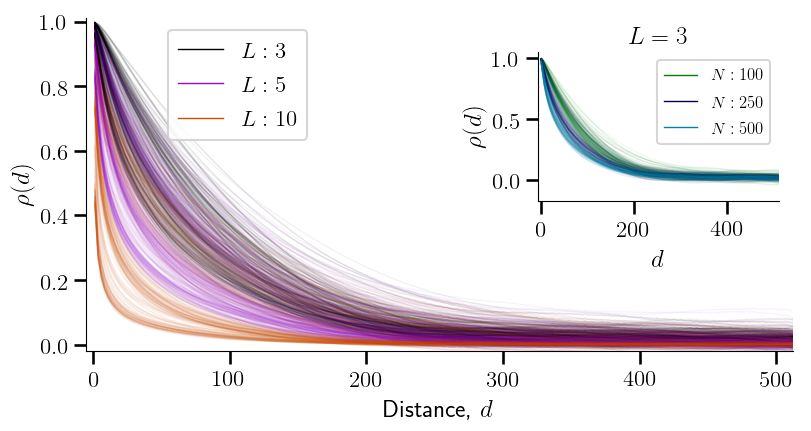

In [10]:
plt.rcParams['text.usetex'] = True
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_context('talk')
plt.rcParams["axes.edgecolor"] = "k"
plt.rcParams["axes.facecolor"] = "w"
plt.rcParams["axes.linewidth"] = "0.8"
plt.rcParams.update({'font.size': 10})

fig, ax = plt.subplots(figsize=(8, 4.2), dpi=100, constrained_layout=True)
# fig.suptitle('Correlation functions of architecture parametrized CPPN generated images')
# plt.xlabel('Distance, $d$')

values = list(np.sort(np.unique([v[highlight_main] for v in means_params])))
norm = colors.Normalize(vmin=0, vmax=len(values))  # age/color mapping
cmap = plt.get_cmap('gnuplot')
ax.set_ylabel(r'$\rho(d)$')
ax.set_xlabel('Distance, $d$')

alpha = np.tanh(0.05 + 1 / len(corrs_means))  ## transparency related to number of lines

for i, corr in enumerate(corr_means):

    corr_value = means_params[i][highlight_main]

    c = cmap(norm(values.index(corr_value)))

    label = '$' + latex_dict[highlight_main] + ': ' + str(corr_value) + '$'

    ax.plot(d, corr, alpha=alpha, linewidth=1, c=c, label=label)

handles, labels = unique_labels(ax)

leg1 = ax.legend(handles, labels, bbox_to_anchor=(0.1, 1), loc='upper left')   # draw the legend with the filtered handles and labels lists
for h in leg1.legendHandles:
    h.set_alpha(1)
    
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


# ax.set_axisbelow(True)
# ax.minorticks_on()
# ax.grid(which='major', linestyle='-', color='black', alpha=0.1)
# ax.grid(which='minor', linestyle=':', color='black', alpha=0.1)


# a.set_xscale('log')
ax.set_xlim([-5, 512])
ax.set_ylim([-0.02, 1.01])

## INSET    

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0, 0, 1, 1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax, [0.64, 0.45, 0.34, 0.45])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
# mark_inset(ax, ax2, loc1=2, loc2=4, fc="none", ec='0.5')

values = list(np.sort(np.unique([v[highlight_inset] for v in arch_means_params])))

norm = colors.Normalize(vmin=0, vmax=len(values))  # age/color mapping

ax2.set_title(f'$L={L}$')
ax2.set_ylabel(r'$\rho(d)$')
ax2.set_xlabel('$d$')
cmap = plt.get_cmap('ocean')


for i, corr in enumerate(arch_corr_means):

    corr_value = arch_means_params[i][highlight_inset]
    
    c = cmap(norm(values.index(corr_value)))

    label = '$' + latex_dict[highlight_inset] + ': ' + str(corr_value) + '$'

    if method == 'sample':
        ax2.plot(np.arange(0, len(corr)),
                   corr, alpha=alpha, linewidth=1, c=c, label=label)

    elif method == 'fft' or method == 'fft_windowed' or method == 'fft_norm':
        ax2.plot(d, corr, alpha=alpha, linewidth=1, c=c, label=label)

    else:
        raise Exception(r'Method must be either "fft", "fft_windowed" or "sample".')

handles, labels = unique_labels(ax2)

leg1 = ax2.legend(handles, labels, prop={'size': 12})  # draw the legend with the filtered handles and labels lists

for h in leg1.legendHandles:
    h.set_alpha(1)

# ax2.set_axisbelow(True)
# ax2.minorticks_on()
# ax2.grid(which='major', linestyle='-', color='black', alpha=0.1)
# ax2.grid(which='minor', linestyle=':', color='black', alpha=0.1)

# ax2.set_yscale('log')
# ax2.set_ylim(1e-7, 0.1)

# ax2.set_xscale('log')
ax2.set_xlim([-5, 512])
# ax2.add_patch(plt.Rectangle((-4, -0.17), 515, 1.2, lw=0.5, ec="k", fc="None"))

# Hide the right and top spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')

time =  datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
name = 'fig1_' + time
filename = 'paper_figures/' + name + '.png'
filename_pdf = 'paper_figures/pdf/' + name + '.pdf'
# plt.savefig(filename, density=600)
# plt.savefig(filename_pdf, density=600)

plt.show()

# (Fig legacy 1) - Correlation difference and p-values (Global)

### Load data

In [4]:
dir = 'save/img_architectures'
img_folder = 'big'
method = 'fft_norm'
corrs_paths, _ = load_img_paths_and_params(dir, img_folder, method)

c_mean_t, c_var_t = global_cppn_stats(dir, img_folder, method, forceCalculate=False)

takeMean = False
aesthetic_corrs, aesthetic_corrs_vars, aesthetic_params = \
    aesthetic_correlations(dir, img_folder, method, takeMean=takeMean, forceCalculate=False)

data_aesthetic = {
    'corrs': aesthetic_corrs,
    'var': aesthetic_corrs_vars,
    'params': aesthetic_params
}

aes_stack_t = np.stack(data_aesthetic['corrs'])

Loading correlation means: save/img_architectures/big/corrs/fft_norm/stats/big_corr_stats.txt
Loading aesthetic correlation: save/img_architectures/big/corrs/fft_norm/aesthetic/big_corr_aesthetics.txt


### Binning, calculate differences and p-values

In [6]:
distances = dist_vec((1023, 1023))
c_mean, bin_edges, _ = scipy.stats.binned_statistic(
            distances, c_mean_t, statistic='mean', bins=512)

c_var, _, _ = scipy.stats.binned_statistic(
            distances, c_var_t, statistic='mean', bins=512)

aes_stack, _, _ = scipy.stats.binned_statistic(
            distances, aes_stack_t, statistic='mean', bins=512)

distances = (bin_edges[1:] + bin_edges[0:-1]) / 2

aes_mean = np.mean(aes_stack, axis=0)
N1 = np.shape(aes_stack)[0]
aes_sigma = np.std(aes_stack, axis=0)

cppn_mean = c_mean
N2 = len(corrs_paths)
cppn_sigma = np.sqrt(c_var)

diff = aes_mean - cppn_mean
vars = (aes_sigma ** 2 / N1) + (c_var / N2)
t = diff / (np.sqrt(vars))

dof1 = N1 - 1
dof2 = N2 - 1
dof = (vars) ** 2 / ((aes_sigma ** 4 / (N1 ** 2 * dof1)) + (c_var ** 2 / (N2 ** 2 * dof2)))

pval = scipy.stats.t.sf(np.abs(t), dof) * 2

### Plot

(-5, 512)

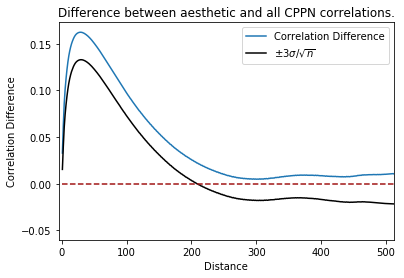

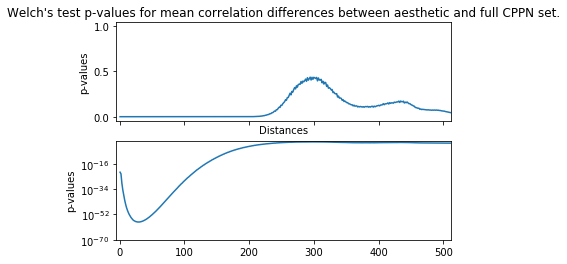

In [7]:
fig, ax = plt.subplots()

sigma_dev = 3
dev = sigma_dev * cppn_sigma / np.sqrt(N1)
ax.plot(distances, diff, label='Correlation Difference')
ax.plot(distances, diff - dev, c='k',
           label=f'$\pm{sigma_dev}\sigma/\sqrt{{n}}$')

x1, y1 = [min(distances), max(distances)], [0, 0]
c = np.divide([160, 19, 19], 255)
ax.plot(x1, y1, '--', c=c)

ax.set_xlabel('Distance')
ax.set_ylabel('Correlation Difference')
ax.set_title('Difference between aesthetic and all CPPN correlations.')
ax.set_xlim([-5, 512])

ax.legend()

# PLOT P-VALUES

fig, ax = plt.subplots(2, 1, sharex=True)
ax2.plot(distances, pval)
ax[1].plot(distances, pval)

ax2.set_title('Welch\'s test p-values for mean correlation differences between aesthetic and full CPPN set.')
ax[0].set_xlabel('Distances')
ax[0].set_ylabel('p-values')
ax[1].set_ylabel('p-values')

ax[1].set_yscale('log')
ax[1].set_ylim([1e-70, 2])

ax[0].set_xlim([-5, 512])
ax[1].set_xlim([-5, 512])

# (Fig - legacy 2) - Correlation difference and P-values (Local)
## (N, L) = (100, 3)

### Load aesthetic images and CPPN images from the same architecture. Remove aesthetic images from CPPN set. 

In [8]:
N = 100
L = 3

dir = 'save/img_architectures'
img_folder = 'big'
method = 'fft_norm'
img_dir = os.path.join(dir, img_folder)

corrs_folder = os.path.join(img_dir, 'corrs', method)
cppn_arch_paths = glob.glob(os.path.join(corrs_folder, f'N{N}*L{L}*.txt'))

jsons_folder = os.path.join(img_dir, 'json')
cppn_arch_json_paths = glob.glob(os.path.join(jsons_folder, f'N{N}*L{L}*.json'))

imgs_params = []
for path in cppn_arch_json_paths:

    imgs_params.append(sampler.loadJSON(path))
	
aes_in_cppn_index = [j for i in range(len(aesthetic_params)) for j in range(len(imgs_params))
                     if aesthetic_params[i] == imgs_params[j]]

mask = np.ones(len(cppn_arch_paths), dtype=bool)
mask[aes_in_cppn_index] = 0

## REDO ABOVE CALCULATIONS NOW WITH MASK ##

aes_index = [i for i in range(len(aesthetic_params)) if (aesthetic_params[i]['num_layers'] == L and aesthetic_params[i]['total_neurons'] == N)]

dir = 'save/img_architectures'
img_folder = 'big'
method = 'fft_norm'
img_dir = os.path.join(dir, img_folder)

corrs_folder = os.path.join(img_dir, 'corrs', method)

cppn_arch_paths = glob.glob(os.path.join(corrs_folder, f'N{N}*L{L}*.txt'))

cppn_arch_paths = [cppn_arch_paths[i] for i in range(len(cppn_arch_paths)) if mask[i] == True]

# LOAD IMAGES #

corrs = []
for corr_path in cppn_arch_paths:
    with open(corr_path, 'rb') as fp:
        corrs.append(pickle.load(fp))
        
aes_stack_t = np.stack([data_aesthetic['corrs'][i] for i in aes_index])

### Binning, calculate difference and p-values

In [12]:
distances = dist_vec((1023, 1023))
corrs_binned, bin_edges, _ = scipy.stats.binned_statistic(
            distances, corrs, statistic='mean', bins=512)

aes_stack, _, _ = scipy.stats.binned_statistic(
            distances, aes_stack_t, statistic='mean', bins=512)
			
distances = (bin_edges[1:] + bin_edges[0:-1]) / 2

aes_mean = np.mean(aes_stack, axis=0)
N1 = np.shape(aes_stack)[0]
aes_sigma = np.std(aes_stack, axis=0)

cppn_mean = np.mean(corrs_binned, axis=0)
N2 = len(corrs_binned)
cppn_sigma = np.std(corrs_binned, axis=0)

diff = aes_mean - cppn_mean
vars = (aes_sigma ** 2 / N1) + (cppn_sigma ** 2 / N2)
t = diff / (np.sqrt(vars))

dof1 = N1 - 1
dof2 = N2 - 1
dof = (vars) ** 2 / ((aes_sigma ** 4 / (N1 ** 2 * dof1)) + (cppn_sigma ** 4 / (N2 ** 2 * dof2)))

pval = scipy.stats.t.sf(np.abs(t), dof) * 2

### Plot

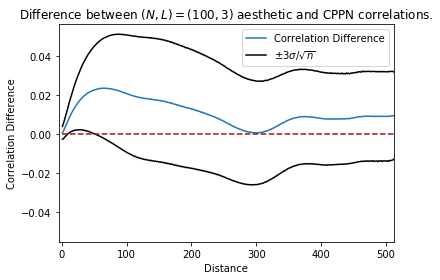

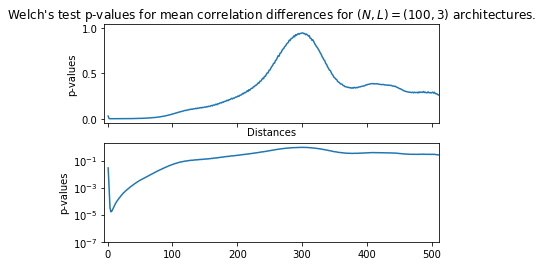

In [13]:
# PLOT DIFFERENCES
fig, ax = plt.subplots()

sigma_dev = 3
dev = sigma_dev * cppn_sigma / np.sqrt(N1)
ax.plot(distances, diff, label='Correlation Difference')
ax.plot(distances, diff - dev, c='k',
           label=f'$\pm{sigma_dev}\sigma/\sqrt{{n}}$')

ax.plot(distances, diff + dev, c='k')
x1, y1 = [0, max(distances)], [0, 0]
c = np.divide([160, 19, 19], 255)
ax.plot(x1, y1, '--', c=c)

ax.set_xlabel('Distance')
ax.set_ylabel('Correlation Difference')
ax.set_title(f'Difference between $(N,L) = ({N},{L})$ aesthetic and CPPN correlations.')
ax.set_xlim([-5, 512])
ax.legend()


# PLOT P-VALUES

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(distances, pval)
ax[1].plot(distances, pval)

ax[0].set_title(f'Welch\'s test p-values for mean correlation differences for $(N,L) = ({N},{L})$ architectures.')
ax[0].set_xlabel('Distances')
ax[0].set_ylabel('p-values')
ax[1].set_ylabel('p-values')

ax[1].set_yscale('log')
ax[1].set_ylim([1e-7, 2])

for a in ax.flatten():
    a.set_xlim([-5, 512])

# (Fig 2) - P-values with inset of correlation functions
## All aesthetic and all CPPN
#### Main: CPPN correlation functions (hairlines); Inset: p-test for correlation difference between aesthetic and CPPN 

### Load data

In [2]:
def load_cppncorrs(forceCalculate=False):
    dir = 'save/img_architectures'
    img_folder = 'big'
    method = 'fft_norm'
    corrs_paths, _ = load_img_paths_and_params(dir, img_folder, method)

    # load global stats
    c_mean_t, c_var_t = global_cppn_stats(dir, img_folder, method, forceCalculate=forceCalculate)

    # load all cppn means

    highlight_keys = [
        'total_neurons',
        'num_layers',
        'omega',
        'alpha',
        'mu'
    ]

    corrs_means, corrs_quantiles, corr_vars, means_params = \
        architecture_correlation_means(dir, img_folder, highlight_keys,
                                       method, forceCalculate=forceCalculate)
    data_cppn = {
        'corrs_means': corrs_means,
        'corr_vars': corr_vars,
    }
    
    return data_cppn, c_mean_t, c_var_t

data_cppn, c_mean_t, c_var_t = load_cppncorrs(forceCalculate=False)

##############################
# # load aesthetic (old)
# takeMean = False
# aesthetic_corrs, aesthetic_corrs_vars, aesthetic_params = \
#     aesthetic_correlations(dir, img_folder, method, takeMean=takeMean, forceCalculate=False)

# data_aesthetic = {
#     'corrs': aesthetic_corrs,
#     'var': aesthetic_corrs_vars,
#     'params': aesthetic_params
# }
##############################

# load aesthetic (new)
img_dir = 'save/img_architectures'
img_folder = 'big'
method = 'fft_norm'

output_filename_pickle = os.path.join(img_dir, 'big_aesthetic_experiment/combined_list')
with open(output_filename_pickle, 'rb') as f:
    aesthetic_info = pickle.load(f)
    
aesthetic_img_names = [a['imgName'] for a in aesthetic_info if a['mode'] == 'COLOUR']   
takeMean = False

aesthetic_corrs, aesthetic_corrs_vars, aesthetic_params = \
    aesthetic_correlations(img_dir, img_folder, aesthetic_img_names, method, takeMean=takeMean, forceCalculate=False)

data_aesthetic = {
    'corrs': aesthetic_corrs,
    'var': aesthetic_corrs_vars,
    'params': aesthetic_params
}

aes_stack_t = np.stack(data_aesthetic['corrs'])

Loading correlation means: save/img_architectures/big/corrs/fft_norm/stats/big_corr_stats.txt
Loading correlation means: save/img_architectures/big/corrs/fft_norm/means/big_corr_means.txt
Loading aesthetic correlation: save/img_architectures/big/corrs/fft_norm/aesthetic/big_corr_aesthetics


In [7]:
aesthetic_img_names = [a['imgName'] for a in aesthetic_info if a['mode'] == 'BW']   
np.shape(aesthetic_img_names)

(1403,)

In [8]:
    np.shape(data_cppn['corrs_means'])[0]

882

### Binning, calculate differences and p-values

In [3]:
distances = dist_vec((1023, 1023))
c_mean, bin_edges, _ = scipy.stats.binned_statistic(
            distances, c_mean_t, statistic='mean', bins=512)

c_var, _, _ = scipy.stats.binned_statistic(
            distances, c_var_t, statistic='mean', bins=512)

aes_stack, _, _ = scipy.stats.binned_statistic(
            distances, aes_stack_t, statistic='mean', bins=512)

corr_means, bin_edges, _ = scipy.stats.binned_statistic(
            distances, data_cppn['corrs_means'], statistic='mean', bins=512)

d = (bin_edges[1:] + bin_edges[0:-1]) / 2

aes_mean = np.mean(aes_stack, axis=0)
N1 = np.shape(aes_stack)[0]
aes_sigma = np.std(aes_stack, axis=0)

cppn_mean = c_mean
N2 = np.shape(data_cppn['corrs_means'])[0]
cppn_sigma = np.sqrt(c_var)

# calculate t stat
diff = aes_mean - cppn_mean
vars = (aes_sigma ** 2 / N1) + (c_var / N2)
t = diff / (np.sqrt(vars))

# calculate DoF
dof1 = N1 - 1
dof2 = N2 - 1
dof = (vars) ** 2 / ((aes_sigma ** 4 / (N1 ** 2 * dof1)) + (c_var ** 2 / (N2 ** 2 * dof2)))

# calculate pvalue from t-stat 
pval = scipy.stats.t.sf(np.abs(t), dof) * 2

### Plot - Main: mean CPPN, mean aesthetic, CPPN hairs - Inset: p-values for mean differences

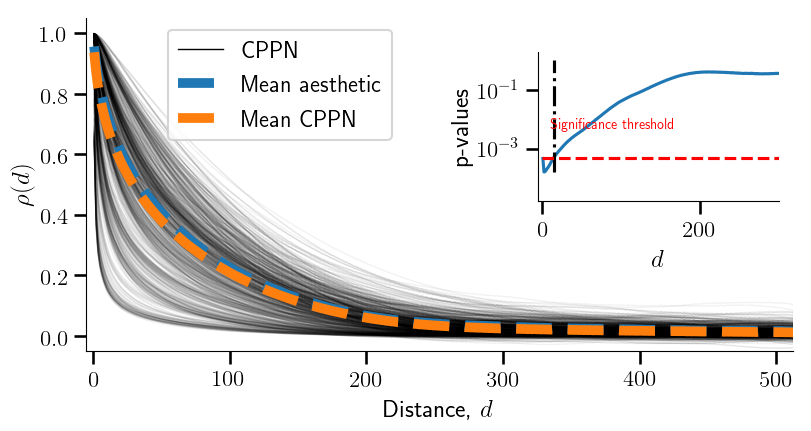

In [4]:
plt.rcParams['text.usetex'] = True
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_context('talk')
plt.rcParams["axes.edgecolor"] = "k"
plt.rcParams["axes.facecolor"] = "w"
plt.rcParams["axes.linewidth"] = "0.8"
plt.rcParams.update({'font.size': 10})

inset = True

fig, ax = plt.subplots(figsize=(8, 4.2), dpi=100, constrained_layout=True)
# fig.suptitle('Correlation functions of CPPN generated images and Aesthetic images')


ax.set_ylabel(r'$\rho(d)$')
ax.set_xlabel('Distance, $d$')
c = 'k'

alpha = np.tanh(0.05 + 1 / N2)  ## transparency related to number of lines

# plot CPPN correlation arch.-means
for i, corr in enumerate(corr_means):
    ax.plot(d, corr, alpha=alpha, linewidth=1, c=c, label='CPPN')

# plot Aesthetic and CPPN correlation means
ax.plot(d, np.mean(aes_stack, axis=0), '--', lw=7, label='Mean aesthetic')
ax.plot(d, np.mean(corr_means, axis=0), '--', lw=7, label='Mean CPPN')

handles, labels = unique_labels(ax)

leg1 = ax.legend(handles, labels, bbox_to_anchor=(0.1, 1), loc='upper left')  # draw the legend with the filtered handles and labels lists
for h in leg1.legendHandles:
    h.set_alpha(1)


# ax.set_axisbelow(True)
# ax.minorticks_on()
# ax.grid(which='major', linestyle='-', color='black', alpha=0.1)
# ax.grid(which='minor', linestyle=':', color='black', alpha=0.1)

# plot lims
# a.set_xscale('log')
ax.set_xlim([-5, 512])
ax.set_ylim([-0.05, 1.05])
# ax.set_yscale('log')
# ax.set_ylim([1e-2, 1.05])


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

## INSET    
if inset:
    # Create a set of inset Axes: these should fill the bounding box allocated to
    # them.
    ax2 = plt.axes([0, 0, 1, 1])
    # Manually set the position and relative size of the inset axes within ax1
    ip = InsetPosition(ax, [0.64, 0.45, 0.34, 0.45])
    ax2.set_axes_locator(ip)
    # Mark the region corresponding to the inset axes on ax1 and draw lines
    # in grey linking the two axes.
    # mark_inset(ax, ax2, loc1=2, loc2=4, fc="none", ec='0.5')

    # PLOT P-VALUES

    ax2.plot(d, pval)

    # ax2.set_title(f'Welch\'s test')
    ax2.set_xlabel('$d$')
    ax2.set_ylabel('p-values')

    ax2.set_yscale('log')
    ax2.set_ylim([0.1*np.min(pval), 2])

    ax2.set_xlim([-5, 300])


    boncor = np.sum(d < 300)
    onesidecor = 2
    thresh = onesidecor * 0.05 / boncor
    d_thresh = np.min(d[pval > thresh])

    x2, y2 = [d_thresh, d_thresh], [min(pval), max(pval)]
    ax2.plot(x2, y2, '-.', c='k')
    ax2.annotate(fr'$d < {d_thresh:.0f}$', [10 + d_thresh, 1e-2*thresh])

    x1, y1 = [0, max(d)], [thresh, thresh]
    ax2.plot(x1, y1, '--', c='r')
    ax2.annotate('Significance threshold', [10, 10*thresh], color='r')

    # Hide the right and top spines
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax2.yaxis.set_ticks_position('left')
    ax2.xaxis.set_ticks_position('bottom')

# time =  datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
# name = 'fig2' + time
# filename = 'paper_figures/' + name + '.png'
# filename_pdf = 'paper_figures/pdf/' + name + '.pdf'
# plt.savefig(filename, density=600)
# plt.savefig(filename_pdf, density=600)

plt.show()

In [25]:
min_sig = np.min(d[pval < thresh])
max_sig = np.max(d[pval < thresh])
print(min_sig, max_sig)

0.7057257132545426 92.45006843634508


In [5]:
thresh

0.0004694835680751174

# (Fig 3) - P-values with inset of correlation functions (local)
## (N, L) = (3, 100)
#### Main: CPPN correlation functions (hairlines); Inset: p-test for correlation difference between aesthetic and CPPN 

### Load aesthetic

In [2]:
##############################
## load aesthetic (old)
# dir = 'save/img_architectures'
# img_folder = 'big'
# method = 'fft_norm'

# takeMean = False
# aesthetic_corrs, aesthetic_corrs_vars, aesthetic_params = \
#     aesthetic_correlations(dir, img_folder, method, takeMean=takeMean, forceCalculate=False)

# data_aesthetic = {
#     'corrs': aesthetic_corrs,
#     'var': aesthetic_corrs_vars,
#     'params': aesthetic_params
# }
##############################


# load aesthetic (new)
def load_aesthetic_corrstats():
    img_dir = 'save/img_architectures'
    img_folder = 'big'
    method = 'fft_norm'

    output_filename_pickle = os.path.join(img_dir, 'big_aesthetic_experiment/combined_list')
    with open(output_filename_pickle, 'rb') as f:
        aesthetic_info = pickle.load(f)

    aesthetic_img_names = [a['imgName'] for a in aesthetic_info if a['mode'] == 'BW']  # only relevant when forceCalculate=True 
    takeMean = False

    aesthetic_corrs, aesthetic_corrs_vars, aesthetic_params = \
        aesthetic_correlations(img_dir, img_folder, aesthetic_img_names, method, takeMean=takeMean, forceCalculate=True)

    data_aesthetic = {
        'corrs': aesthetic_corrs,
        'var': aesthetic_corrs_vars,
        'params': aesthetic_params
    }

    
    return data_aesthetic

data_aesthetic = load_aesthetic_corrstats()

Calculating aesthetic correlations...


In [5]:
np.shape(data_aesthetic['corrs'])

(1403, 523776)

### Load and mask CPPN correlations

In [3]:
def mask_all_corrstats(data_aesthetic, N, L):

    dir = 'save/img_architectures'
    img_folder = 'big'
    method = 'fft_norm'
    img_dir = os.path.join(dir, img_folder)

    corrs_folder = os.path.join(img_dir, 'corrs', method)
    cppn_arch_paths = glob.glob(os.path.join(corrs_folder, f'N{N}*L{L}*.txt'))

    jsons_folder = os.path.join(img_dir, 'json')
    cppn_arch_json_paths = glob.glob(os.path.join(jsons_folder, f'N{N}*L{L}*.json'))

    imgs_params = []
    for path in cppn_arch_json_paths:

        imgs_params.append(sampler.loadJSON(path))
    
    aesthetic_params = data_aesthetic['params']
    aes_in_cppn_index = [j for i in range(len(aesthetic_params)) for j in range(len(imgs_params))
                         if aesthetic_params[i] == imgs_params[j]]

    mask = np.ones(len(cppn_arch_paths), dtype=bool)
    mask[aes_in_cppn_index] = 0

    ## REDO ABOVE CALCULATIONS NOW WITH MASK ##

    aes_index = [i for i in range(len(aesthetic_params)) if (aesthetic_params[i]['num_layers'] == L and aesthetic_params[i]['total_neurons'] == N)]

    dir = 'save/img_architectures'
    img_folder = 'big'
    method = 'fft_norm'
    img_dir = os.path.join(dir, img_folder)

    corrs_folder = os.path.join(img_dir, 'corrs', method)

    cppn_arch_paths = glob.glob(os.path.join(corrs_folder, f'N{N}*L{L}*.txt'))

    cppn_arch_paths = [cppn_arch_paths[i] for i in range(len(cppn_arch_paths)) if mask[i] == True]

    # LOAD IMAGES #

    corrs = []
    for corr_path in cppn_arch_paths:
        with open(corr_path, 'rb') as fp:
            corrs.append(pickle.load(fp))

    aes_stack_t = np.stack([data_aesthetic['corrs'][i] for i in aes_index])
    
    return corrs, aes_stack_t
    
N = 500
L = 10
corrs_all, aes_stack_t = mask_all_corrstats(data_aesthetic, N, L)

### Load and mask CPPN correlations (presented only)

In [3]:
import imghdr

N = 500
L = 10
mode = 'BW'  ## WARNING: still need to load the correct aesthetic correlation database (COLOUR/BW) above!!!

# def mask_all_corrstats_presented(data_aesthetic, N, L, mode):
    
## LOAD IN COMBINED LIST
img_dir = 'save/img_architectures'
img_folder = 'big'
method = 'fft_norm'

output_filename_pickle = os.path.join(img_dir, 'big_aesthetic_experiment/combined_list')
with open(output_filename_pickle, 'rb') as f:
    aesthetic_info = pickle.load(f)

## GENERATE PRESENTED IMAGE NAMES
wd = 'save/img_architectures/big_aesthetic_experiment/presented'
sub_folder = np.unique(['subject_' + a['subject'] for a in aesthetic_info])

img_paths = []
for s in sub_folder:
    img_folder_path = os.path.join(wd, s, mode)
    # load filenames if they are png files (images dont have extensions and there are hidden files in these folders)
    im_names = np.stack([''.join(f.split('_', 1)[1:]) for f in os.listdir(img_folder_path)
                         if imghdr.what(os.path.join(img_folder_path, f)) is 'png'])
    img_paths.append(im_names)

presented_imgs = np.stack(img_paths).reshape(-1)

## LOAD ALL IMAGES FROM ARCHITECTURE
dir = 'save/img_architectures'
img_dir = os.path.join(dir, img_folder)

corrs_folder = os.path.join(img_dir, 'corrs', method)
cppn_arch_paths = glob.glob(os.path.join(corrs_folder, f'N{N}*L{L}*.txt'))

jsons_folder = os.path.join(img_dir, 'json')
cppn_arch_json_paths = glob.glob(os.path.join(jsons_folder, f'N{N}*L{L}*.json'))

imgs_params = []
for path in cppn_arch_json_paths:

    imgs_params.append(sampler.loadJSON(path))

# cppn indices of the aesthetic images
aesthetic_params = data_aesthetic['params']
aes_in_cppn_index = [j for i in range(len(aesthetic_params)) for j in range(len(imgs_params))
                     if aesthetic_params[i] == imgs_params[j]]

# cppn indices of the presented images
cppn_im_names = [os.path.splitext(os.path.basename(c_a_p))[0] for c_a_p in cppn_arch_paths]
presented_in_cppn_index = [j for i in range(len(presented_imgs)) for j in range(len(imgs_params))
                     if presented_imgs[i] == cppn_im_names[j]]

# mask out images from cppn set
# mask = np.ones(len(cppn_arch_paths), dtype=bool)
mask = np.zeros(len(cppn_arch_paths), dtype=bool)
mask[np.asarray(presented_in_cppn_index)] = 1  # mask of images not presented
print(f'Number of unique presented images in CPPN: {np.sum(mask)}')

mask[aes_in_cppn_index] = 0  # mask of images tagged as aesthetic
print(f'Number of aesthetic images configurate (N, L)={N, L}: {len(aes_in_cppn_index)}')
print(f'Number of presented images of configurate (N, L)={N, L}: {len(presented_in_cppn_index)}')
print(f'Number of presented not selected images in CPPN: {np.sum(mask)}')


# mask out images from aesthetic set
aes_index = [i for i in range(len(aesthetic_params)) if (aesthetic_params[i]['num_layers'] == L and aesthetic_params[i]['total_neurons'] == N)]

# get correlation paths
dir = 'save/img_architectures'
img_dir = os.path.join(dir, img_folder)

corrs_folder = os.path.join(img_dir, 'corrs', method)

cppn_arch_paths = glob.glob(os.path.join(corrs_folder, f'N{N}*L{L}*.txt'))

cppn_arch_paths = [cppn_arch_paths[i] for i in range(len(cppn_arch_paths)) if mask[i] == True]

# load correlations
corrs = []
for corr_path in cppn_arch_paths:
    with open(corr_path, 'rb') as fp:
        corrs.append(pickle.load(fp))

aes_stack_t = np.stack([data_aesthetic['corrs'][i] for i in aes_index])

# return corrs, aes_stack_t
    
# N = 500
# L = 10
# mode = 'BW'  ## WARNING: still need to load the correct aesthetic correlation database (COLOUR/BW) above!!!
# corrs, aes_stack_t = mask_all_corrstats_presented(data_aesthetic, N, L, mode)

Number of unique presented images in CPPN: 882
Number of aesthetic images configurate (N, L)=(500, 10): 135
Number of presented images of configurate (N, L)=(500, 10): 1016
Number of presented not selected images in CPPN: 855


In [82]:
len(presented_in_cppn_index)

1016

In [81]:
len(set(presented_imgs))

7949

In [62]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

len(intersection(aes_in_cppn_index, presented_in_cppn_index))

27

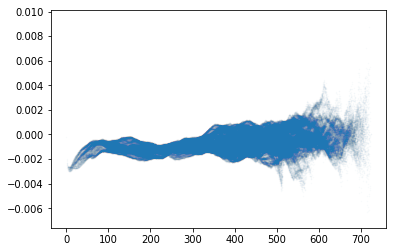

In [5]:
distances = dist_vec((1023, 1023))
diff = np.mean(corrs_all, axis=0) - np.mean(corrs, axis=0)
plt.scatter(distances, diff, s=0.05, alpha=0.05)

### Bin, calculate p-values

In [4]:
distances = dist_vec((1023, 1023))
corrs_binned, bin_edges, _ = scipy.stats.binned_statistic(
            distances, corrs, statistic='mean', bins=512)

aes_stack, _, _ = scipy.stats.binned_statistic(
            distances, aes_stack_t, statistic='mean', bins=512)

d = (bin_edges[1:] + bin_edges[0:-1]) / 2

aes_mean = np.mean(aes_stack, axis=0)
N1 = np.shape(aes_stack)[0]
aes_sigma = np.std(aes_stack, axis=0)

cppn_mean = np.mean(corrs_binned, axis=0)
N2 = len(corrs_binned)
cppn_sigma = np.std(corrs_binned, axis=0)

diff = aes_mean - cppn_mean
vars = (aes_sigma ** 2 / N1) + (cppn_sigma ** 2 / N2)
t = diff / (np.sqrt(vars))

dof1 = N1 - 1
dof2 = N2 - 1
dof = (vars) ** 2 / ((aes_sigma ** 4 / (N1 ** 2 * dof1)) + (cppn_sigma ** 4 / (N2 ** 2 * dof2)))

pval = scipy.stats.t.sf(np.abs(t), dof) * 2

### Clustering

In [11]:
import umap
import seaborn as sns

In [12]:
all_corrs = np.concatenate((corrs, aes_stack_t), axis=0)
all_index = np.concatenate( (np.arange(0, np.shape(corrs_binned)[0]), np.tile(np.shape(corrs_binned)[0], np.shape(aes_stack)[0])) )
s = np.concatenate( (np.tile(15,np.shape(corrs_binned)[0]), np.tile(90, np.shape(aes_stack)[0])) )

standard_embedding = umap.UMAP(random_state=42).fit_transform(all_corrs)

In [16]:
np.save('embedding', standard_embedding)
np.save('c_index', all_index)
np.save('s_index', s)

In [3]:
standard_embedding = np.load('embedding.npy')
all_index = np.load('c_index.npy')
s = np.load('s_index.npy')

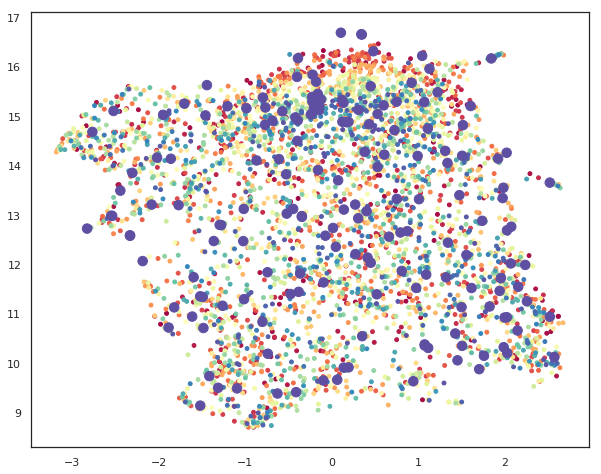

In [17]:
sns.set(style='white', rc={'figure.figsize':(10,8)})
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1],c=all_index, s=s, cmap='Spectral');

### Plot

2.1171771397636276 9.174434272309053


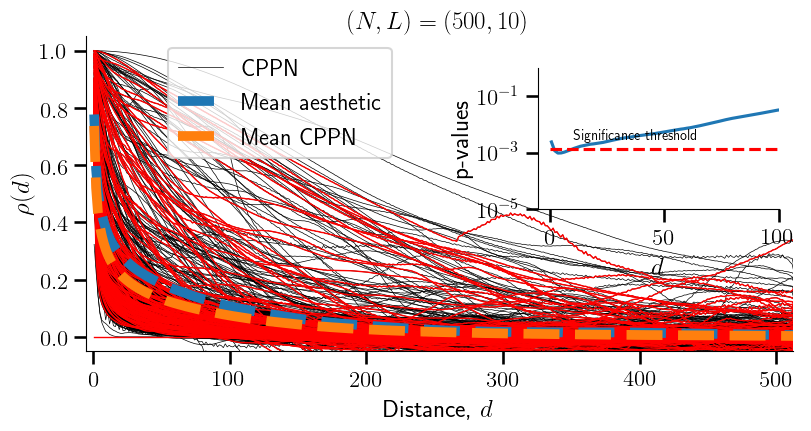

In [11]:
plt.rcParams['text.usetex'] = True
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_context('talk')
plt.rcParams["axes.edgecolor"] = "k"
plt.rcParams["axes.facecolor"] = "w"
plt.rcParams["axes.linewidth"] = "0.8"
plt.rcParams.update({'font.size': 10})

fig, ax = plt.subplots(figsize=(8, 4.2), dpi=100, constrained_layout=True)
# fig.suptitle(f'Correlation functions of (N, L) = ({N}, {L}) CPPN and Aesthetic images')


ax.set_ylabel(r'$\rho(d)$')
ax.set_xlabel('Distance, $d$')
ax.set_title(fr'$(N, L) = ({N},{L})$')

alpha = np.tanh(0.05 + 1 / len(corrs_binned))  ## transparency related to number of lines



for i, corr in enumerate(corrs_binned):
    ax.plot(d, corr, alpha=1, lw=0.5, c='k', label='CPPN')
    
for i, corr in enumerate(aes_stack):
    ax.plot(d, corr, lw=1, c='r')
    
ax.plot(d, np.mean(aes_stack, axis=0), '--', lw=7, label='Mean aesthetic')
ax.plot(d, np.mean(corrs_binned, axis=0), '--', lw=7, label='Mean CPPN')
    
# for i, corr in enumerate(aes_stack):
#     ax.plot(d, corr, alpha=alpha, ls=':', lw=2, c='r', label='Aesthetic')

# main axis legend
handles, labels = unique_labels(ax)

leg1 = ax.legend(handles, labels, bbox_to_anchor=(0.1, 1), loc='upper left')  # draw the legend with the filtered handles and labels lists
for h in leg1.legendHandles:
    h.set_alpha(1)


# ax.set_axisbelow(True)
# ax.minorticks_on()
# ax.grid(which='major', linestyle='-', color='black', alpha=0.1)
# ax.grid(which='minor', linestyle=':', color='black', alpha=0.1)


# a.set_xscale('log')
ax.set_xlim([-5, 512])
ax.set_ylim([-0.05, 1.05])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

## INSET    

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0, 0, 1, 1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax, [0.64, 0.45, 0.34, 0.45])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
# mark_inset(ax, ax2, loc1=2, loc2=4, fc="none", ec='0.5')

# PLOT P-VALUES
max_d = 100
ax2.plot(d, pval)

# ax2.set_title(f'Welch\'s test')
ax2.set_xlabel('$d$')
ax2.set_ylabel('p-values')

y_min = np.min([np.min(pval), 1e-5])
ax2.set_yscale('log')
ax2.set_ylim([y_min, 1])
ax2.set_xlim([-5, max_d])

boncor = np.sum(d < max_d)
onesidecor = 2
thresh = onesidecor * 0.05 / boncor

x1, y1 = [0, max(d)], [thresh, thresh]
ax2.plot(x1, y1, '--', c='r')
ax2.annotate('Significance threshold', [10, 2*thresh])

# Hide the right and top spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')

time =  datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
name = f'fig3_app_N_{N}_L_{L}_' + time
filename = 'paper_figures/' + name + '.png'
filename_pdf = 'paper_figures/pdf/' + name + '.pdf'
plt.savefig(filename, density=600)
plt.savefig(filename_pdf, density=600)

min_sig = np.min(d[pval < thresh])
max_sig = np.max(d[pval < thresh])
print(min_sig, max_sig)

# ax2.fill_betweenx([10-6, 0], 0, , alpha=0.2, color='r')

In [7]:
np.min(pval)

2.493504711323106e-07

In [19]:
import gc
gc.collect()

54

# (Fig 4) - Architecture aesthetic scatter plot

## Load aesthetic params (old)

In [2]:
wd = 'save/img_architectures'
img_folder = 'big'
method = 'fft_norm'

with open('save/img_architectures/big/aesthetic_tag', 'r') as f:
    aesthetic_dirs = f.read().splitlines()
    
takeMean = False

_, _, aesthetic_params = \
    aesthetic_correlations(wd, img_folder, aesthetic_dirs, method, takeMean=takeMean, forceCalculate=False)

Loading aesthetic correlation: save/img_architectures/big/corrs/fft_norm/aesthetic/big_corr_aesthetics.txt


## Load aesthetic params (new)

In [2]:
img_dir = 'save/img_architectures'
img_folder = 'big'
method = 'fft_norm'

output_filename_pickle = os.path.join(img_dir, 'big_aesthetic_experiment/combined_list')
with open(output_filename_pickle, 'rb') as f:
    aesthetic_info = pickle.load(f)
    
aesthetic_img_names = [a['imgName'] for a in aesthetic_info if a['mode'] == 'COLOUR']    # only relevant if forceCalculate=True
takeMean = False

_, _, aesthetic_params = \
    aesthetic_correlations(img_dir, img_folder, aesthetic_img_names, method, takeMean=takeMean, forceCalculate=False)


Loading aesthetic correlation: save/img_architectures/big/corrs/fft_norm/aesthetic/big_corr_aesthetics


### Plot

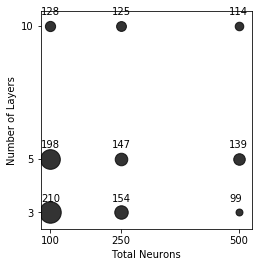

In [3]:
## ARCHITECTURE SCATTER PLOT ## 

import itertools
Ls=[3, 5, 10]
Ns=[100, 250, 500]

x = list(itertools.product(Ns, Ls))
	
# x = list(set([(p['total_neurons'], p['num_layers']) for p in means_params]))  # need to load all of cppn data for this

aes_counter = np.zeros(len(x))

for p in aesthetic_params:
    ii = x.index((p['total_neurons'], p['num_layers']))
    aes_counter[ii] += 1
    
fig, ax = plt.subplots()

for i, ss in enumerate(aes_counter):
    s = ss**3/20000
    xx, yy = x[i]
    ax.scatter(xx, yy, s=s, alpha=0.8, c='k')
    ax.annotate(f'{ss:.0f}', (xx-20, yy+0.42), color='k')
    
ax.set_xlabel('Total Neurons')
ax.set_ylabel('Number of Layers')
xzero = np.min(Ns) - max(aes_counter)/4
yzero = 2
# ax.set_xlim([xzero, np.max(Ns) + np.abs(xzero)])
# ax.set_ylim([yzero, np.max(Ls) + np.abs(yzero)])

yt = list(set([f[1] for f in x]))
xt = list(set([f[0] for f in x]))
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.set_aspect((np.max(Ns) - xzero)/(np.max(Ls) - yzero))

time =  datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
name = 'fig4_' + time
filename = 'paper_figures/' + name + '.png'
filename_pdf = 'paper_figures/pdf/' + name + '.pdf'
plt.savefig(filename, density=600)
plt.savefig(filename_pdf, density=600)

In [32]:
print(aes_counter)

[170. 169.  86. 213. 164. 144. 178. 144. 135.]


# (Fig 5) Natural images correlation functions

### Load (N, L) = (3,100) aesthetic corrs

In [3]:
dir = 'save/img_architectures'
img_folder = 'big'
method = 'fft_norm'

takeMean = False
aesthetic_corrs, aesthetic_corrs_vars, aesthetic_params = \
    aesthetic_correlations(dir, img_folder, method, takeMean=takeMean, forceCalculate=False)

data_aesthetic = {
    'corrs': aesthetic_corrs,
    'var': aesthetic_corrs_vars,
    'params': aesthetic_params
}

# N = 100
# L = 3

# aes_index = [i for i in range(len(aesthetic_params)) if (aesthetic_params[i]['num_layers'] == L and aesthetic_params[i]['total_neurons'] == N)]
# aes_stack_t = np.stack([data_aesthetic['corrs'][i] for i in aes_index])

Ns = [100, 250 , 500]
Ls = [3, 5, 10]

aes_stack_t = []
NL = []
for N in Ns:
    for L in Ls:
        NL.append((N, L))
        aes_index = [i for i in range(len(aesthetic_params)) if (aesthetic_params[i]['num_layers'] == L and aesthetic_params[i]['total_neurons'] == N)]
        aes_stack_t.append(np.stack([data_aesthetic['corrs'][i] for i in aes_index]))
        
        

Loading aesthetic correlation: save/img_architectures/big/corrs/fft_norm/aesthetic/big_corr_aesthetics.txt


### Load natural corrs

In [4]:
dir = 'natural_imgs/'
img_folders = ['Foliage', 'LandWater', 'Animals', 'Flowers', 'ManMade']
# img_folders = ['Animals', 'Flowers', 'ManMade']
method = 'fft_norm'  # 'fft_norm', 'sample'


corrs_means, _, corr_vars = \
    correlation_means(dir, img_folders, method, forceCalculate=False)

data_nat = {
    'corrs_means': corrs_means,
    'corr_var': corr_vars,
    'img_folders': img_folders
}

Loading correlation means: natural_imgs/Foliage/corrs/fft_norm/means/Foliage_corr_means.txt
Loading correlation means: natural_imgs/LandWater/corrs/fft_norm/means/LandWater_corr_means.txt
Loading correlation means: natural_imgs/Animals/corrs/fft_norm/means/Animals_corr_means.txt
Loading correlation means: natural_imgs/Flowers/corrs/fft_norm/means/Flowers_corr_means.txt
Loading correlation means: natural_imgs/ManMade/corrs/fft_norm/means/ManMade_corr_means.txt


### Load CPPN corrs

In [5]:
dir = 'save/img_architectures'
img_folder = 'big'
method = 'fft_norm'

## DON'T CHANGE ##
highlight_keys = [
    'total_neurons',
    'num_layers',
    'omega',
    'alpha',
    'mu'
]


corrs_means, corrs_quantiles, corr_vars, means_params = \
    architecture_correlation_means(dir, img_folder, highlight_keys,
                                   method, forceCalculate=False)
data_cppn = {
    'corrs_means': corrs_means,
    'corr_vars': corr_vars,
}

Loading correlation means: save/img_architectures/big/corrs/fft_norm/means/big_corr_means.txt


### Bin

In [6]:
distances = dist_vec((1023, 1023))  ## assumes a 512x512 image.

# aes_stack, bin_edges, _ = scipy.stats.binned_statistic(
#     distances, aes_stack_t, statistic='mean', bins=512)

corr_cppn, _, _ = scipy.stats.binned_statistic(
    distances, data_cppn['corrs_means'], statistic='mean', bins=512)

corr_nat = []
for corr_n in data_nat['corrs_means']:
    corr_nat_t, _, _ = scipy.stats.binned_statistic(
        distances, corr_n[0], statistic='mean', bins=512)
    corr_nat.append(corr_nat_t)

aes_stack = []
for corr in aes_stack_t:
    aes_stack_t2, bin_edges, _ = scipy.stats.binned_statistic(
        distances, corr, statistic='mean', bins=512)
    
    aes_stack.append(aes_stack_t2)
    

d = (bin_edges[:-1] + bin_edges[1:]) / 2

### Plot

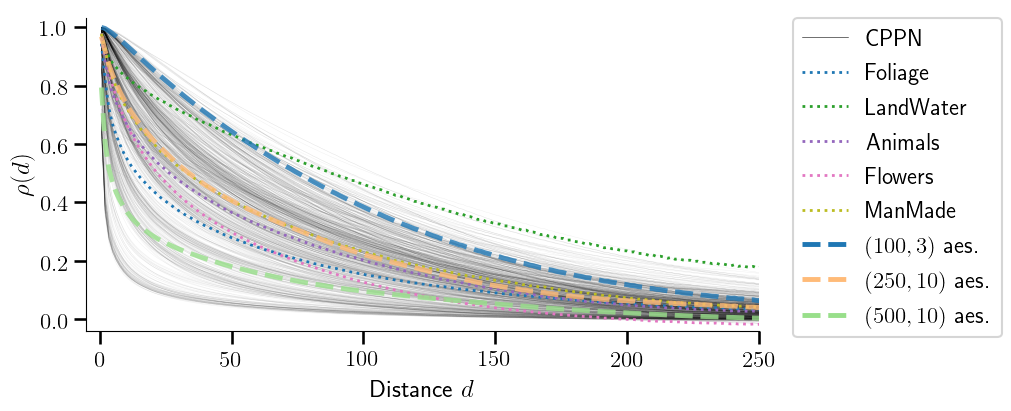

In [8]:
plt.rcParams['text.usetex'] = True
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_context('talk')
plt.rcParams["axes.edgecolor"] = "k"
plt.rcParams["axes.facecolor"] = "w"
plt.rcParams["axes.linewidth"] = "0.8"
plt.rcParams.update({'font.size': 10})


fig, ax = plt.subplots(figsize=(10, 4), dpi=100, constrained_layout=True)
# fig.suptitle('Correlation functions of architecture parametrized CPPN generated images')
plt.xlabel('Distance')

ax.set_ylabel(r'$\rho(d)$')
ax.set_xlabel('Distance $d$')

alpha = np.tanh(0.05 + 1 / len(corrs_means))  ## transparency related to number of lines

for corr in corr_cppn:
    ax.plot(d, corr, alpha=alpha, lw=0.4, c='k', label='CPPN')

cmap = plt.get_cmap('tab10')
norm = colors.Normalize(vmin=0, vmax=len(corr_nat))  # age/color mapping
for i, corr in enumerate(corr_nat):
    c = cmap(norm(i))
    ax.plot(d, corr, ':', alpha=1, lw=2, c=c, label=img_folders[i])
    
# cmap = plt.get_cmap('ocean')
# norm = colors.Normalize(vmin=0, vmax=0)  # age/color mapping
# c = cmap(norm(0))
# ax.plot(d, np.mean(aes_stack, axis=0), '--', c=c, alpha=1, lw=4,
#         label=f'$(N, L) = ({N},{L})$ aesthetic')

aes_plot_index = [0, 5, 8]
cmap = plt.get_cmap('tab20')
norm = colors.Normalize(vmin=0, vmax=30)  # age/color mapping


for i in aes_plot_index:
    c = cmap(norm(i))
    ax.plot(d, np.mean(aes_stack[i], axis=0), '--', c=c, alpha=0.8, lw=3.5,
        label=f'$({NL[i][0]},{NL[i][1]})$ aes.')

handles, labels = unique_labels(ax)

leg1 = ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)  # draw the legend with the filtered handles and labels lists

for h in leg1.legendHandles:
    h.set_alpha(1)


# ax.set_axisbelow(True)
# ax.minorticks_on()
# ax.grid(which='major', linestyle='-', color='black', alpha=0.1)
# ax.grid(which='minor', linestyle=':', color='black', alpha=0.1)


# ax.set_yscale('log')
# ax.set_ylim([0.01, 1])

ax.set_xlim([-5, 250])
ax.set_ylim([-0.04, 1.03])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

time =  datetime.now().strftime("%y-%m-%d-%H-%M-%S.%f")
name = 'fig5_' + time
filename = 'paper_figures/' + name + '.png'
filename_pdf = 'paper_figures/pdf/' + name + '.pdf'
plt.savefig(filename, density=600)
plt.savefig(filename_pdf, density=600)

In [9]:
len(aes_stack[0])

333

In [22]:
NL

[(100, 3),
 (100, 5),
 (100, 10),
 (250, 3),
 (250, 5),
 (250, 10),
 (500, 3),
 (500, 5),
 (500, 10)]

# Clustering

### Load cppn mean correlations and stats

In [4]:
data_cppn, c_mean_t, c_var_t = load_cppncorrs(forceCalculate=False)

Loading correlation means: save/img_architectures/big/corrs/fft_norm/stats/big_corr_stats.txt
Loading correlation means: save/img_architectures/big/corrs/fft_norm/means/big_corr_means.txt


### Load individual CPPN images

    

In [23]:
from PIL import Image

def load_image_directories(img_folder=None):
    # make a list of all imgs in image directory

    dir = 'save/img_architectures'
    
    imgs_folder = os.path.join(dir, img_folder)
    jsons_folder =  jsons_folder = os.path.join(imgs_folder, 'json')
    
    imgs_paths = [os.path.join(imgs_folder, f) for f in os.listdir(imgs_folder) if f.endswith('.png')]
    
    img_name = [os.path.splitext(os.path.basename(im))[0] for im in imgs_paths]
    jsons_path = [os.path.join(jsons_folder, im + '.json') for im in img_name]


    return imgs_paths, jsons_path

# load paths
img_folder = 'big'
imgs_paths, jsons_path = load_image_directories(img_folder)

# load images
imgs = []
imgs_params = []
for i, img_path in enumerate(imgs_paths):
    # resize, take luminosity, flatten
    imgs.append(np.array(Image.open(img_path).resize(size=(128, 128)).convert('L')).reshape(-1))
    imgs_params.append(sampler.loadJSON(jsons_path[i]))
    


In [130]:
np.shape(imgs)

(35280, 16384)

### Load individual CPPN correlations

In [2]:
def load_corr_directories(img_folder=None, method='fft_norm'):
    # make a list of all imgs in image directory

    dir = 'save/img_architectures'
    
    imgs_folder = os.path.join(dir, img_folder)
    corrs_folder = os.path.join(imgs_folder, 'corrs', method)
    jsons_folder =  jsons_folder = os.path.join(imgs_folder, 'json')
    
    corrs_paths = [os.path.join(corrs_folder, f) for f in os.listdir(corrs_folder) if f.endswith('.txt')]
    
    img_name = [os.path.splitext(os.path.basename(im))[0] for im in corrs_paths]
    jsons_path = [os.path.join(jsons_folder, im + '.json') for im in img_name]


    return corrs_paths, jsons_path

# load paths
img_folder = 'big'
corrs_paths, jsons_path = load_corr_directories(img_folder)

# load params
cppn_params = []
for i, jp in enumerate(jsons_path):    
    cppn_params.append(sampler.loadJSON(jp))

# sort params (so it's easier to sample more specifically)
## DON'T CHANGE ##
filter_keys = [
    'total_neurons',
    'num_layers',
    'omega',
    'alpha',
    'mu'
]
# sort so similar params are together, with iteration number as well
sort_keys = filter_keys[:]
sort_keys.append('iteration')

sort_list = [tuple((img_params[k]) for k in sort_keys) for img_params in cppn_params]
sort_indices = sorted(enumerate(sort_list), key=itemgetter(1))
sort_indices = [i[0] for i in sort_indices]

# if you want to sort the indices with respect to different img_params then use:
# sorted(enumerate(sort_list), key=lambda x: enum_sort_order(x, [1, 0, 2, 3, 4, 5]))

corrs_paths = [corrs_paths[i] for i in sort_indices]
cppn_params = [cppn_params[i] for i in sort_indices]

# load only N images per architecture
N = 10
mask_i = [i for i in range(0, len(corrs_paths), N)]
mask = np.zeros(np.shape(corrs_paths))
mask[mask_i] = 1
mask = mask > 0

corrs_paths = np.array(corrs_paths)[mask]
cppn_params = np.array(cppn_params)[mask]

# load correlations
cppn_corrs = []
for i, corr_path in enumerate(corrs_paths):
    with open(corr_path, 'rb') as fp:
        cppn_corrs.append(pickle.load(fp))

In [3]:
np.shape(cppn_corrs)

(1764, 523776)

### Load aesthetic correlations (new)

In [7]:
# load aesthetic (new)
img_dir = 'save/img_architectures'
img_folder = 'big'
method = 'fft_norm'

output_filename_pickle = os.path.join(img_dir, 'big_aesthetic_experiment/combined_list')
with open(output_filename_pickle, 'rb') as f:
    aesthetic_info = pickle.load(f)
    
aesthetic_img_names = [a['imgName'] for a in aesthetic_info if a['mode'] == 'BW']
takeMean = False

aesthetic_corrs, aesthetic_corrs_vars, aesthetic_params = \
    aesthetic_correlations(img_dir, img_folder, aesthetic_img_names, method, takeMean=takeMean, forceCalculate=True)

data_aesthetic = {
    'corrs': aesthetic_corrs,
    'var': aesthetic_corrs_vars,
    'params': aesthetic_params
}

aes_stack_t = np.stack(data_aesthetic['corrs'])

Calculating aesthetic correlations...


### Load aesthetic images

In [43]:
# load aesthetic (new)
img_dir = 'save/img_architectures'
img_folder = 'big'
method = 'fft_norm'

output_filename_pickle = os.path.join(img_dir, 'big_aesthetic_experiment/combined_list')
with open(output_filename_pickle, 'rb') as f:
    aesthetic_info = pickle.load(f)
    
aesthetic_img_names = [a['imgName'] for a in aesthetic_info if a['mode'] == 'BW']

# load images
aes_imgs = []
aes_imgs_params = []
for i, aim in enumerate(aesthetic_img_names):
    img_path = os.path.join(img_dir, img_folder, aim + '.png')
    
    # resize, take luminosity, flatten
    aes_imgs.append(np.array(Image.open(img_path).resize(size=(128, 128)).convert('L')).reshape(-1))
    aes_imgs_params.append(sampler.loadJSON(jsons_path[i]))

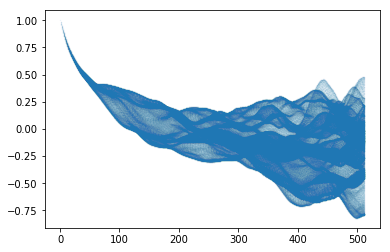

In [17]:
# distances = dist_vec((1023, 1023))
ii = 100
plt.scatter(distances[distances<512], aes_stack_t[ii][distances<512], s=0.1, alpha=0.1)

### Bin correlations

In [35]:
distances = dist_vec((1023, 1023))

aes_stack, bin_edges, _ = scipy.stats.binned_statistic(
            distances, aes_stack_t, statistic='mean', bins=2048)

d = (bin_edges[1:] + bin_edges[0:-1]) / 2

### Subject average correlations

In [3]:
sub_names = [a['subject'] for a in aesthetic_info if a['mode'] == 'BW']
values = np.unique(sub_names)
sub_index = [list(values).index(sname) for sname in sub_names]
unique_subs = np.unique(sub_index)

aes_sub_stack = []
for US in unique_subs:
    mask = sub_index == US
    aes_sub_stack.append(np.mean(aes_stack_t[mask], axis=0))

In [11]:
distances = dist_vec((1023, 1023))

sub_stack, bin_edges, _ = scipy.stats.binned_statistic(
            distances, aes_sub_stack, statistic='mean', bins=2048)

d = (bin_edges[1:] + bin_edges[0:-1]) / 2

In [69]:
c = np.tile(np.arange(0, 45), (np.shape(sub_stack)[1], 1)).reshape(-1)
c.shape

(92160,)

In [77]:
distances = dist_vec((1023, 1023))

all_aes_stack, bin_edges, _ = scipy.stats.binned_statistic(
            distances, data_aesthetic['corrs'], statistic='mean', bins=2048)

d = (bin_edges[1:] + bin_edges[0:-1]) / 2

(0.01, 2)

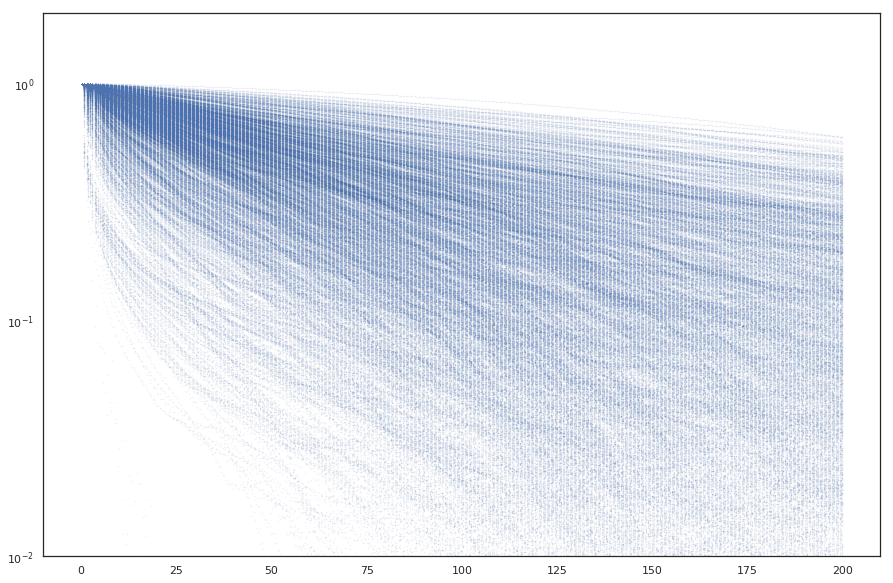

In [98]:
# distances = dist_vec((1023, 1023))
fig, ax = plt.subplots(figsize=(15, 10))

d_plot = np.tile(d, (np.shape(all_aes_stack)[0],1))
mask = d_plot < 200
ax.scatter(d_plot[mask], all_aes_stack[mask], s=0.2, alpha=0.1)
# ax.set_ylim([-0.2, 1])
ax.set_yscale('log')
ax.set_ylim([1e-2, 2])


In [9]:
# NL = [(mp['total_neurons'], mp['num_layers'], mp['omega'], mp['mu']) for mp in means_params]
# NL = [(mp['total_neurons'], mp['num_layers'], mp['omega'], mp['mu'], mp['alpha']) for mp in data_cppn['means_params']]
NL = [(mp['total_neurons'], mp['num_layers']) for mp in data_cppn['means_params']]
setNL = set(NL)
setNL = sorted(setNL, key=lambda tup: (tup[0],tup[1]) )
NL_cindex = [setNL.index(nl) for nl in NL]

NameError: name 'data_cppn' is not defined

In [89]:
setNL

[(100, 3, -0.5, -0.1),
 (100, 3, 0, -0.1),
 (100, 3, 0.5, -0.1),
 (100, 3, 1, -0.5),
 (100, 3, 1, 0),
 (100, 3, 1, 0.5),
 (100, 3, 2, 0.1),
 (100, 3, 1, 1),
 (100, 3, -2, -0.1),
 (100, 3, -1, -0.1),
 (100, 3, 2, 1),
 (100, 3, 1, -0.1),
 (100, 3, -1, 1),
 (100, 3, -2, 1),
 (100, 3, -2, 0.1),
 (100, 3, -1, 0.1),
 (100, 3, 2, -0.5),
 (100, 3, 2, 0),
 (100, 3, 2, 0.5),
 (100, 3, 1, 0.1),
 (100, 3, -0.5, 1),
 (100, 3, 0, 1),
 (100, 3, 0.5, 1),
 (100, 3, -1, 0.5),
 (100, 3, -0.5, -1),
 (100, 3, -2, 0),
 (100, 3, -2, -0.5),
 (100, 3, -2, 0.5),
 (100, 3, -1, -0.5),
 (100, 3, -1, 0),
 (100, 3, 0, -1),
 (100, 3, 0.5, -1),
 (100, 3, -2, -1),
 (100, 3, -1, -1),
 (100, 3, -0.5, -0.5),
 (100, 3, -0.5, 0),
 (100, 3, -0.5, 0.5),
 (100, 3, 0, -0.5),
 (100, 3, 0, 0),
 (100, 3, 0, 0.5),
 (100, 3, 0.5, -0.5),
 (100, 3, 0.5, 0),
 (100, 3, 0.5, 0.5),
 (100, 3, 2, -0.1),
 (100, 3, 2, -1),
 (100, 3, -0.5, 0.1),
 (100, 3, 0, 0.1),
 (100, 3, 0.5, 0.1),
 (100, 3, 1, -1),
 (100, 5, 1, 0.1),
 (100, 5, -0.5, 1),
 (

[(-2, -1),
 (-2, -0.5),
 (-2, -0.1),
 (-2, 0),
 (-2, 0.1),
 (-2, 0.5),
 (-2, 1),
 (-1, -1),
 (-1, -0.5),
 (-1, -0.1),
 (-1, 0),
 (-1, 0.1),
 (-1, 0.5),
 (-1, 1),
 (-0.5, -1),
 (-0.5, -0.5),
 (-0.5, -0.1),
 (-0.5, 0),
 (-0.5, 0.1),
 (-0.5, 0.5),
 (-0.5, 1),
 (0, -1),
 (0, -0.5),
 (0, -0.1),
 (0, 0),
 (0, 0.1),
 (0, 0.5),
 (0, 1),
 (0.5, -1),
 (0.5, -0.5),
 (0.5, -0.1),
 (0.5, 0),
 (0.5, 0.1),
 (0.5, 0.5),
 (0.5, 1),
 (1, -1),
 (1, -0.5),
 (1, -0.1),
 (1, 0),
 (1, 0.1),
 (1, 0.5),
 (1, 1),
 (2, -1),
 (2, -0.5),
 (2, -0.1),
 (2, 0),
 (2, 0.1),
 (2, 0.5),
 (2, 1)]

## UMAP

In [40]:
import umap
import hdbscan
from sklearn.decomposition import PCA

import seaborn as sns

/home/skhajehabdollahi/Documents/cppn-tensorflow-master/venv/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/skhajehabdollahi/Documents/cppn-tensorflow-master/venv/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## CPPN vs Aesthetic

In [69]:
# stack data
# all_corrs = np.concatenate((data_cppn['corrs_means'], aes_sub_stack), axis=0)

# plot colour/size
numArchs = np.shape(data_cppn['corrs_means'])[0]
numSubs = np.shape(unique_subs)[0]

c_all_index = np.concatenate( (np.array(NL_cindex), np.tile(np.max(NL_cindex), numSubs) ) )
s = np.concatenate( (np.tile(15,numArchs), np.tile(90, numSubs)) )


'['

In [ ]:
# UMAP embedding
standard_embedding = umap.UMAP(n_neighbors=30,
                               min_dist=0.0,
                               n_components=2,
                               random_state=42
                              ).fit_transform(all_corrs)

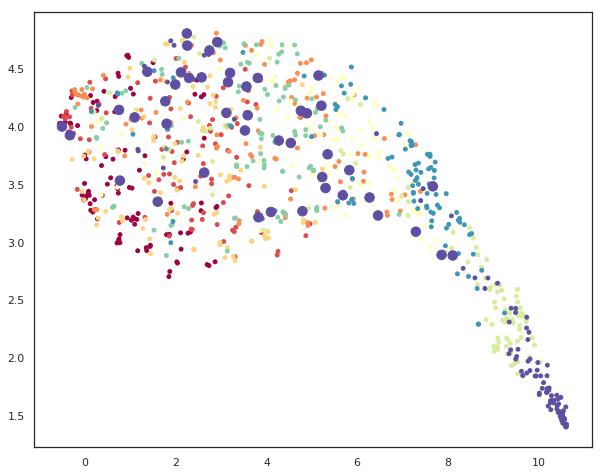

In [78]:
sns.set(style='white', rc={'figure.figsize':(10,8)})

fig, ax = plt.subplots()
ax.scatter(standard_embedding[:, 0], standard_embedding[:, 1],c=c_all_index, s=s, cmap='Spectral');

In [25]:
np.shape(all_index)

(2285,)

In [26]:
sub_index

[10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 

In [21]:
list(set(NL)).index((100, 3))

6

## CPPNs (UMAP/CLUSTERING)

In [9]:
# data = data_cppn['corrs_means']
data = np.concatenate((cppn_corrs, aes_stack_t))

MemoryError: 

In [4]:
np.shape(imgs)

(35280, 16384)

In [5]:
# UMAP (standard/visualization embedding)
standard_embedding = umap.UMAP(
    n_components=2,
    random_state=42,
).fit_transform(data)

In [ ]:
# img_json = [sampler.loadJSON(jp) for jp in jsons_path]  # use aes_img_params instead

In [20]:
# aesthetic_img_names
aes_cppn_index = [i for i, ip in enumerate(imgs_paths) for aim in aesthetic_img_names if aim in os.path.splitext(os.path.basename(ip))[0]]

NameError: name 'imgs_paths' is not defined

In [67]:
aes_cppn_index[0]

18

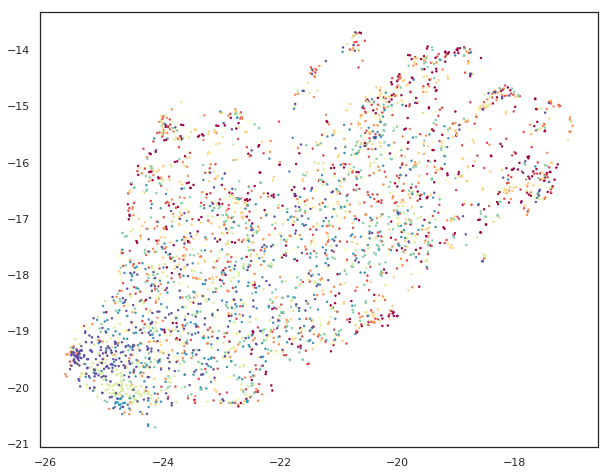

In [8]:
# arch_label = [(ij['total_neurons'], ij['num_layers']) for ij in img_json]
arch_label = [(ij['total_neurons'], ij['num_layers']) for ij in cppn_params]
aes_label = [(ij['total_neurons'], ij['num_layers']) for ij in data_aesthetic['params']]
all_label = np.concatenate((arch_label, aes_label))
# arch_label = [ij['total_neurons'] for ij in img_json]
setNL = set(arch_label)
setNL = sorted(setNL, key=lambda tup: (tup[0],tup[1]) )
# setNL = sorted(setNL, key=lambda tup: tup )
NL_cindex = [setNL.index(nl) for nl in arch_label]

# aes_label = [i for ]
# aNL_cindex = np.array(NL_cindex)[aes_cppn_index]

sns.set(style='white', rc={'figure.figsize':(10,8)})

fig, ax = plt.subplots()
ax.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=2, alpha=1, c=NL_cindex, cmap='Spectral');
# ax.scatter(clusterable_embedding[aes_cppn_index, 0], clusterable_embedding[aes_cppn_index, 1], s=5, alpha=0.75, c=aNL_cindex, cmap='Spectral');

In [108]:
NL_cindex

[2,
 6,
 3,
 0,
 6,
 8,
 8,
 0,
 2,
 7,
 3,
 5,
 2,
 8,
 8,
 6,
 0,
 8,
 1,
 7,
 1,
 1,
 4,
 7,
 6,
 0,
 2,
 4,
 5,
 8,
 1,
 5,
 7,
 6,
 0,
 0,
 6,
 8,
 1,
 1,
 7,
 4,
 5,
 7,
 6,
 8,
 7,
 8,
 0,
 5,
 4,
 2,
 4,
 3,
 0,
 7,
 8,
 3,
 5,
 3,
 3,
 7,
 4,
 4,
 2,
 6,
 1,
 2,
 0,
 2,
 2,
 8,
 4,
 0,
 3,
 4,
 2,
 2,
 4,
 7,
 3,
 6,
 8,
 6,
 6,
 2,
 6,
 8,
 7,
 2,
 2,
 2,
 2,
 7,
 2,
 5,
 0,
 3,
 8,
 4,
 2,
 1,
 8,
 1,
 3,
 4,
 0,
 4,
 2,
 3,
 2,
 1,
 1,
 7,
 5,
 4,
 8,
 5,
 1,
 0,
 1,
 4,
 6,
 7,
 3,
 3,
 6,
 0,
 4,
 7,
 2,
 3,
 5,
 6,
 5,
 5,
 7,
 7,
 6,
 2,
 1,
 4,
 8,
 2,
 5,
 7,
 6,
 3,
 3,
 6,
 6,
 5,
 8,
 7,
 4,
 8,
 3,
 4,
 5,
 0,
 6,
 2,
 6,
 4,
 2,
 2,
 6,
 4,
 3,
 7,
 3,
 4,
 2,
 8,
 2,
 3,
 3,
 6,
 1,
 1,
 0,
 8,
 8,
 0,
 1,
 1,
 2,
 8,
 6,
 0,
 2,
 4,
 0,
 2,
 5,
 7,
 1,
 5,
 8,
 2,
 0,
 4,
 6,
 2,
 3,
 3,
 1,
 7,
 6,
 3,
 7,
 0,
 6,
 7,
 8,
 4,
 2,
 0,
 8,
 3,
 5,
 0,
 4,
 1,
 2,
 0,
 0,
 1,
 6,
 1,
 1,
 5,
 1,
 8,
 4,
 6,
 5,
 5,
 7,
 0,
 4,
 1,
 8,
 7,
 7,
 1,
 2,
 5,
 5,
 8,


In [11]:
# UMAP (clustering embedding)
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0,
    n_components=10,
    random_state=42,
).fit_transform(data)

In [95]:
np.shape(clusterable_embedding)

(882, 2)

In [13]:
# HDBSCAN
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(clusterable_embedding)

(882,)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


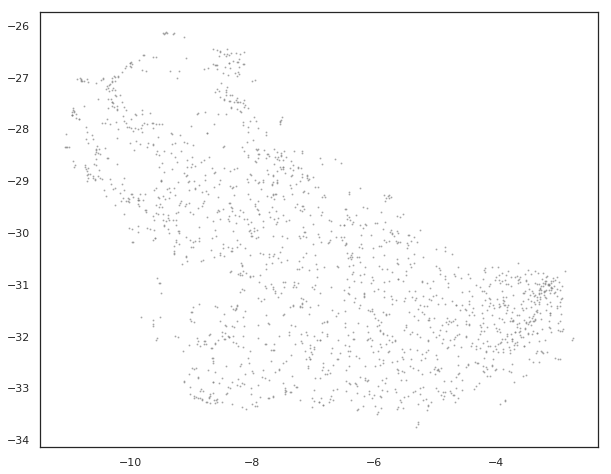

In [17]:
clustered = (labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral')
plt.scatter(standard_embedding[aes_cppn_index, 0],
            standard_embedding[aes_cppn_index, 1],
            c='k',
            alpha=0.5,
            markers='tri_up',
#             c=np.array(labels)[aes_cppn_index],
            s=5,
            cmap='Spectral')

In [17]:
labels

array([-1,  1,  1, ...,  1,  1,  1])

# Comparing BW and COLOUR

In [ ]:
dir = 'save/img_architectures'
img_folder = 'big'
method = 'fft_norm'

c_mean, c_var = global_cppn_stats(dir, img_folder, method, forceCalculate=False)

In [16]:
img_dir = 'save/img_architectures'
img_folder = 'big'
method = 'fft_norm'

output_filename_pickle = os.path.join(img_dir, 'big_aesthetic_experiment/combined_list')
with open(output_filename_pickle, 'rb') as f:
    aesthetic_info = pickle.load(f)

# load BW images
aesthetic_img_names = [a['imgName'] for a in aesthetic_info if a['mode'] == 'BW']   
takeMean = False
COLOUR_corrs, COLOUR_vars, COLOUR_params = \
    aesthetic_correlations(img_dir, img_folder, aesthetic_img_names, method, takeMean=takeMean, forceCalculate=True)

# load colour images
aesthetic_img_names = [a['imgName'] for a in aesthetic_info if a['mode'] == 'COLOUR']   
takeMean = False
BW_corrs, BW_vars, BW_params = \
    aesthetic_correlations(img_dir, img_folder, aesthetic_img_names, method, takeMean=takeMean, forceCalculate=True)



Calculating aesthetic correlations...
Calculating aesthetic correlations...


In [25]:
m_COLOUR_corrs = np.mean(COLOUR_corrs, axis=0)
m_BW_corrs = np.mean(BW_corrs, axis=0)

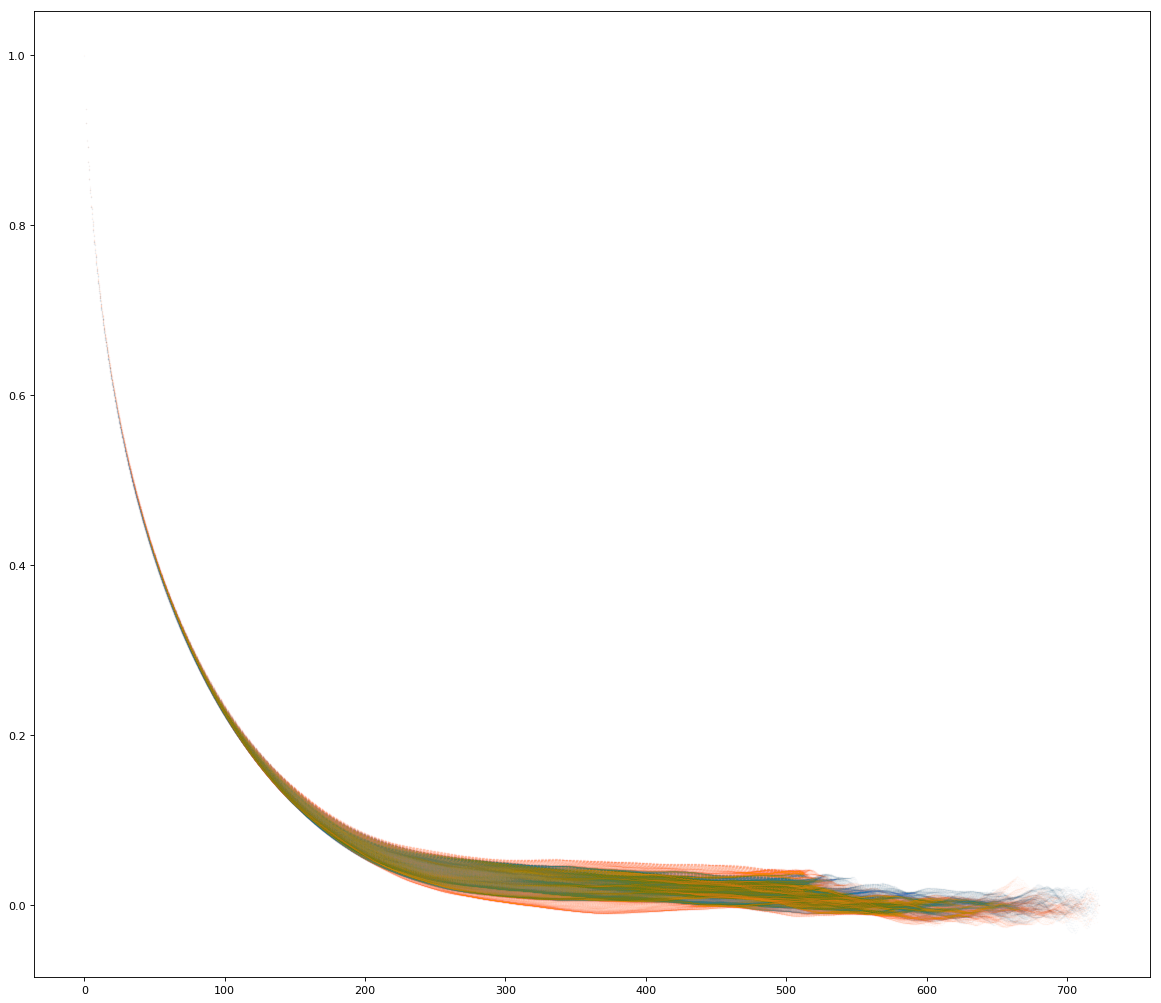

In [43]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
distances = dist_vec((1023, 1023))
plt.scatter(distances, m_COLOUR_corrs, s=0.05, alpha=0.05)

distances = dist_vec((1023, 1023))
plt.scatter(distances, m_BW_corrs, s=0.05, alpha=0.05)

# plt.yscale('log')
# plt.ylim([1e-5, 1.5])

In [ ]:
b_diff, bin_edges, _ = scipy.stats.binned_statistic(
            distances, diff, statistic='mean', bins=512)

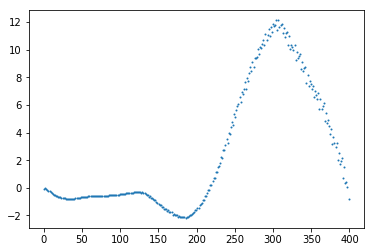

In [42]:
diff = m_COLOUR_corrs - m_BW_corrs

bm_COLOUR_corrs, _, _ = scipy.stats.binned_statistic(
            distances, m_COLOUR_corrs, statistic='mean', bins=512)

b_diff, bin_edges, _ = scipy.stats.binned_statistic(
            distances, diff, statistic='mean', bins=512)

d = (bin_edges[1:] + bin_edges[0:-1]) / 2

plt.scatter(d[d<400], b_diff[d<400]/bm_COLOUR_corrs[d<400]*100, s=1)

# Presentation Figures

In [1]:
from calculate_all_correlations_parallel import *
import scipy.signal
from PIL import Image
import matplotlib.pyplot as plt

In [60]:
img_folder = 'big'
img_paths = load_image_directories(img_folder)

i = 51
imgC = np.array(Image.open(img_paths[i]))/255
img = np.array(Image.open(img_paths[i]).convert('L'))/255

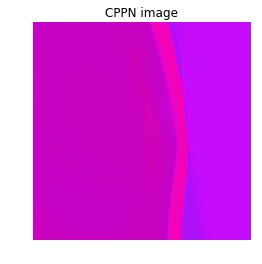

In [61]:
fig, ax = plt.subplots()
ax.imshow(imgC)
ax.axis('off')
ax.set_title('CPPN image')

plt.savefig('presentation_figs/img_simple', dpi=300, frameon=False)

In [62]:
I = np.ones(np.shape(img))
mass = np.round(scipy.signal.fftconvolve(I, I))
clean = True
###########
local_mean = scipy.signal.fftconvolve(img, I) / mass
sum_img_sqr = scipy.signal.fftconvolve(img ** 2, I)

if clean:
    local_mean[local_mean < 0] = 0
    sum_img_sqr[sum_img_sqr < 0] = 0

local_var = (sum_img_sqr - mass * local_mean ** 2) / mass

if clean:
    local_var[local_var < 1e-8] = 1e-8
    local_var[np.isinf(local_var)] = np.nan


G = scipy.signal.fftconvolve(img, img[::-1, ::-1])
means_terms = mass * -1 * (local_mean * local_mean[::-1, ::-1])
auto_corr = (G + means_terms) / (mass * np.sqrt(local_var * local_var[::-1, ::-1]))


shape = np.shape(auto_corr)
# iu = np.triu_indices(n=shape[0], m=shape[1])

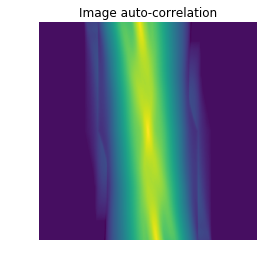

In [63]:
fig, ax = plt.subplots()
ax.imshow(auto_corr)
ax.axis('off')
ax.set_title('Image auto-correlation')

plt.savefig('presentation_figs/autocorr_img_smooth', dpi=300, frameon=False)

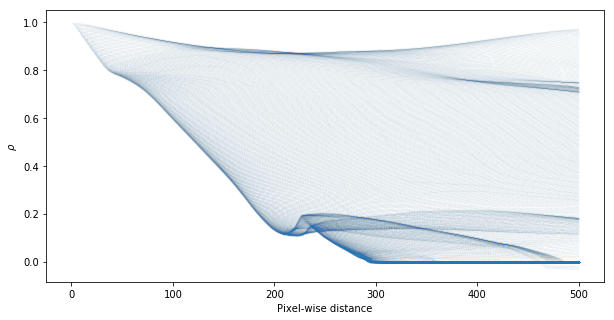

In [66]:
distances = dist_vec((1023, 1023))
thetas = -theta_vec((1023, 1023)) * 180 / np.pi
iu = np.triu_indices(n=shape[0], m=shape[1])
corr = auto_corr[iu]

mask = distances < 500
distances = distances[mask]
thetas = thetas[mask]
corr = corr[mask]

fig, ax = plt.subplots(figsize=(10, 5))
cs = ax.scatter(distances, corr, s=0.05, alpha=0.05)
# cs = ax.scatter(distances, corr, s=0.05, alpha=0.05, c=thetas, cmap='Spectral')
ax.set_xlabel('Pixel-wise distance')
ax.set_ylabel(r'$\rho$')
# ax.set_ylim([corr.min(), 0.25])

# cbar = fig.colorbar(cs)
# cbar.set_alpha(1)
# cbar.draw_all()
# cbar.ax.get_yaxis().set_ticks([135, 90, 45, 0, -45])
# cbar.set_label(r'$\theta$')

plt.savefig('presentation_figs/autocorr_scatter_smooth', dpi=300, frameon=False)